<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [96]:
#This code below checks if TensorFlow is able to identify the GPU by DeepLizard
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: list index out of range

In [97]:
# pic = load_img('/Users/sophie/Desktop/Mushrooms_Pictures/Test/Not_Poisonous/000_pIBnrKk4HoA.jpg')
# pic.getpixel
# pic_array = img_to_array(pic)
# pic_array.shape
# pic

In [161]:
train_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Train'
valid_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Validation'
test_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Test'

image_gen = ImageDataGenerator(rescale= 1. /255) # create a data generator rescale= 1. /255

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=2000
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=400
)

test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=100
)

X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))


X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 3599 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 1343 images belonging to 2 classes.
This is the X_train: Batch shape=(2000, 256, 256, 3), min=0.000, max=1.000
This is the X_validation: Batch shape=(400, 256, 256, 3), min=0.000, max=1.000
This is the X_test: Batch shape=(100, 256, 256, 3), min=0.000, max=1.000
[1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0.]


# STEP 2: VISUALIZE DATA

In [139]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

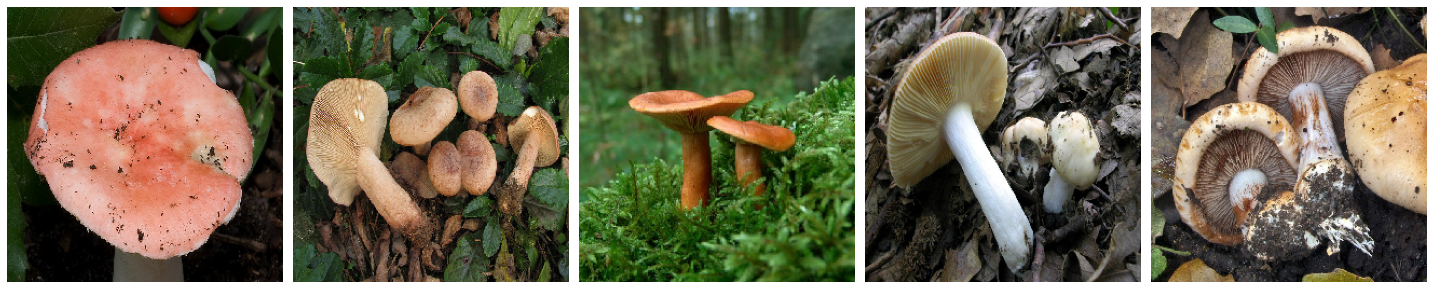

[1. 1. 1. ... 1. 1. 1.]


In [140]:
plotImages(X_train)
print(y_train)

# STEP 3: DATA PREPARATION

In [148]:
# get the shape without the sampling
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [142]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [143]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 252, 252, 6)       456       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 126, 126, 6)       0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 122, 122, 16)      2416      
_________________________________________________________________
average_pooling2d_20 (Averag (None, 61, 61, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 59536)           

In [144]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [149]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 69s 35ms/step - loss: 0.7443 - accuracy: 0.7210 - val_loss: 0.9931 - val_accuracy: 0.7775
Epoch 2/50
2000/2000 [==============================] - 63s 32ms/step - loss: 0.5763 - accuracy: 0.7625 - val_loss: 2.4326 - val_accuracy: 0.7775
Epoch 3/50
2000/2000 [==============================] - 62s 31ms/step - loss: 0.5057 - accuracy: 0.7660 - val_loss: 0.6435 - val_accuracy: 0.7800
Epoch 4/50
2000/2000 [==============================] - 62s 31ms/step - loss: 0.4659 - accuracy: 0.7920 - val_loss: 0.8985 - val_accuracy: 0.7550
Epoch 5/50
2000/2000 [==============================] - 62s 31ms/step - loss: 0.3874 - accuracy: 0.8340 - val_loss: 0.7818 - val_accuracy: 0.6975
Epoch 6/50
2000/2000 [==============================] - 62s 31ms/step - loss: 0.2967 - accuracy: 0.8785 - val_loss: 0.6660 - val_accuracy: 0.7450
Epoch 7/50
2000/2000 [==============================] - 62s 31ms/step - loss:

In [ ]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=5,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2000 samples, validate on 400 samples
Epoch 1/5
2000/2000 [==============================] - 65s 32ms/step - loss: 0.4141 - accuracy: 0.8595 - val_loss: 0.6437 - val_accuracy: 0.7100
Epoch 2/5
2000/2000 [==============================] - 62s 31ms/step - loss: 0.2130 - accuracy: 0.9220 - val_loss: 0.8549 - val_accuracy: 0.7350
Epoch 3/5
2000/2000 [==============================] - 64s 32ms/step - loss: 0.0801 - accuracy: 0.9700 - val_loss: 1.0004 - val_accuracy: 0.6900
Epoch 4/5
1984/2000 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9829

# STEP 5: EVALUATE THE MODEL

In [159]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)

In [160]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.5600


In [152]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

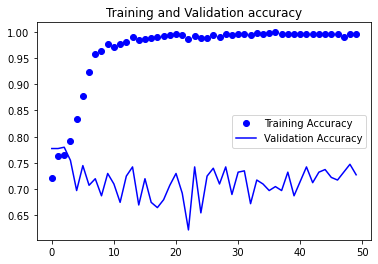

In [153]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

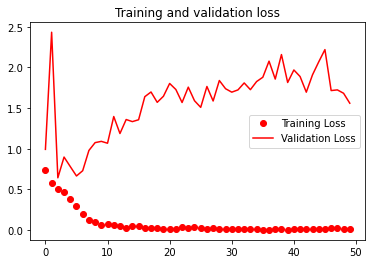

In [154]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [155]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#get the indices to be plotted
y_true = y_test

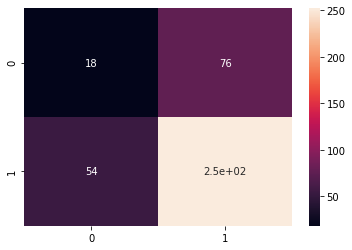

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

Predicted Poisonous and turns out to be poisonous (correct): 2.5e + 02 <br>
Predicted Poisonous and turns out to be not poisonous: 54 <br>
Predicted Not Poisonous and turns out to be poisonous: 76 <br>
Predicted Not Poisonous and turns out to be not poisonous(correct): 18 <br>

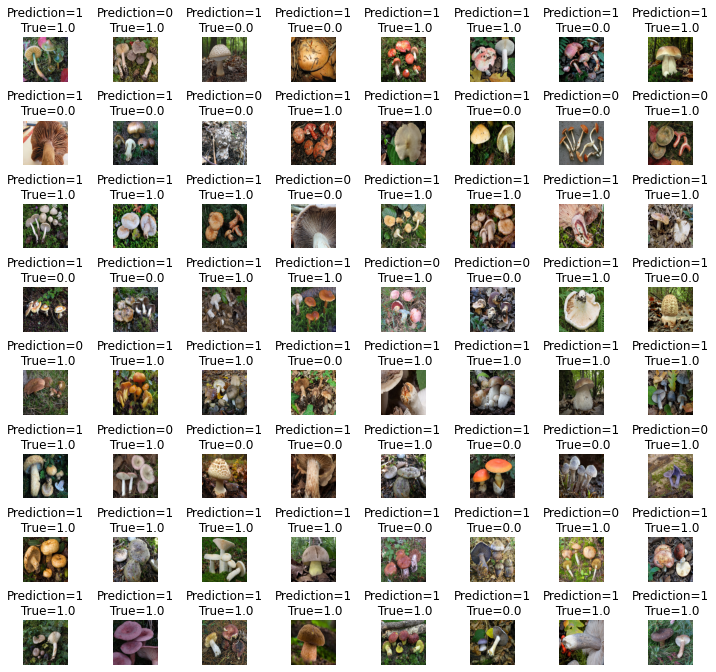

In [137]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)